In [7]:
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter
from compas.geometry import delaunay_from_points

import math

sides = 9

points = []
a_increment = math.pi * 2 / sides 

for i in range(sides):
    x = 10 * math.cos(i*a_increment)
    y = 10 * math.sin(i*a_increment)
    points.append([x,y,0])

In [8]:
faces = delaunay_from_points(points)
mesh0 = Mesh.from_vertices_and_faces(points, faces)

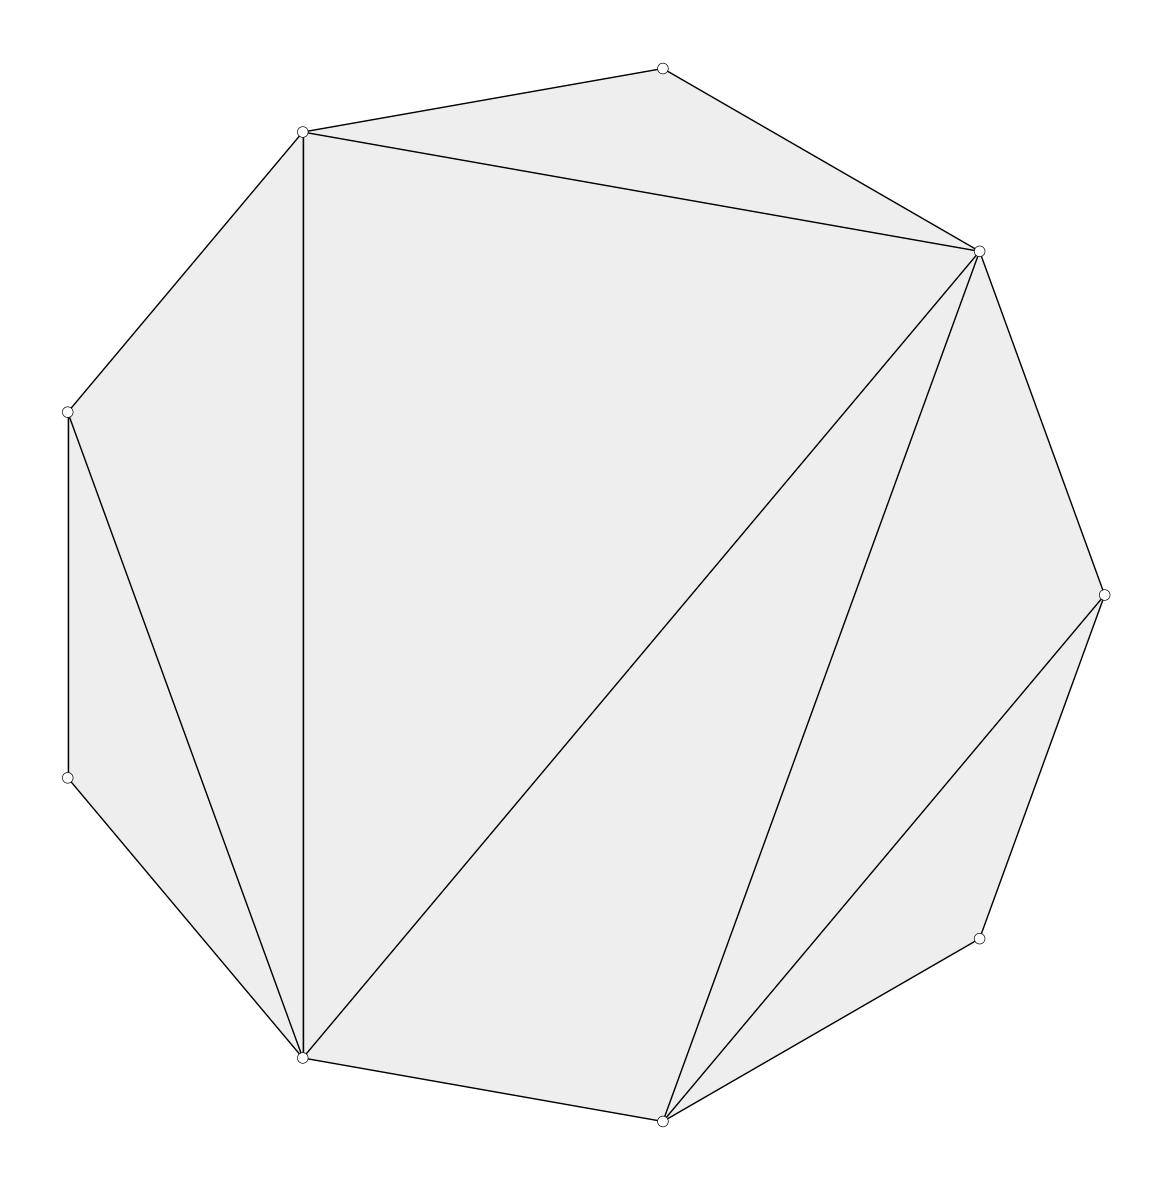

In [9]:

plotter = MeshPlotter(mesh0)
plotter.draw_edges()
plotter.draw_vertices()
plotter.draw_faces()
plotter.show()

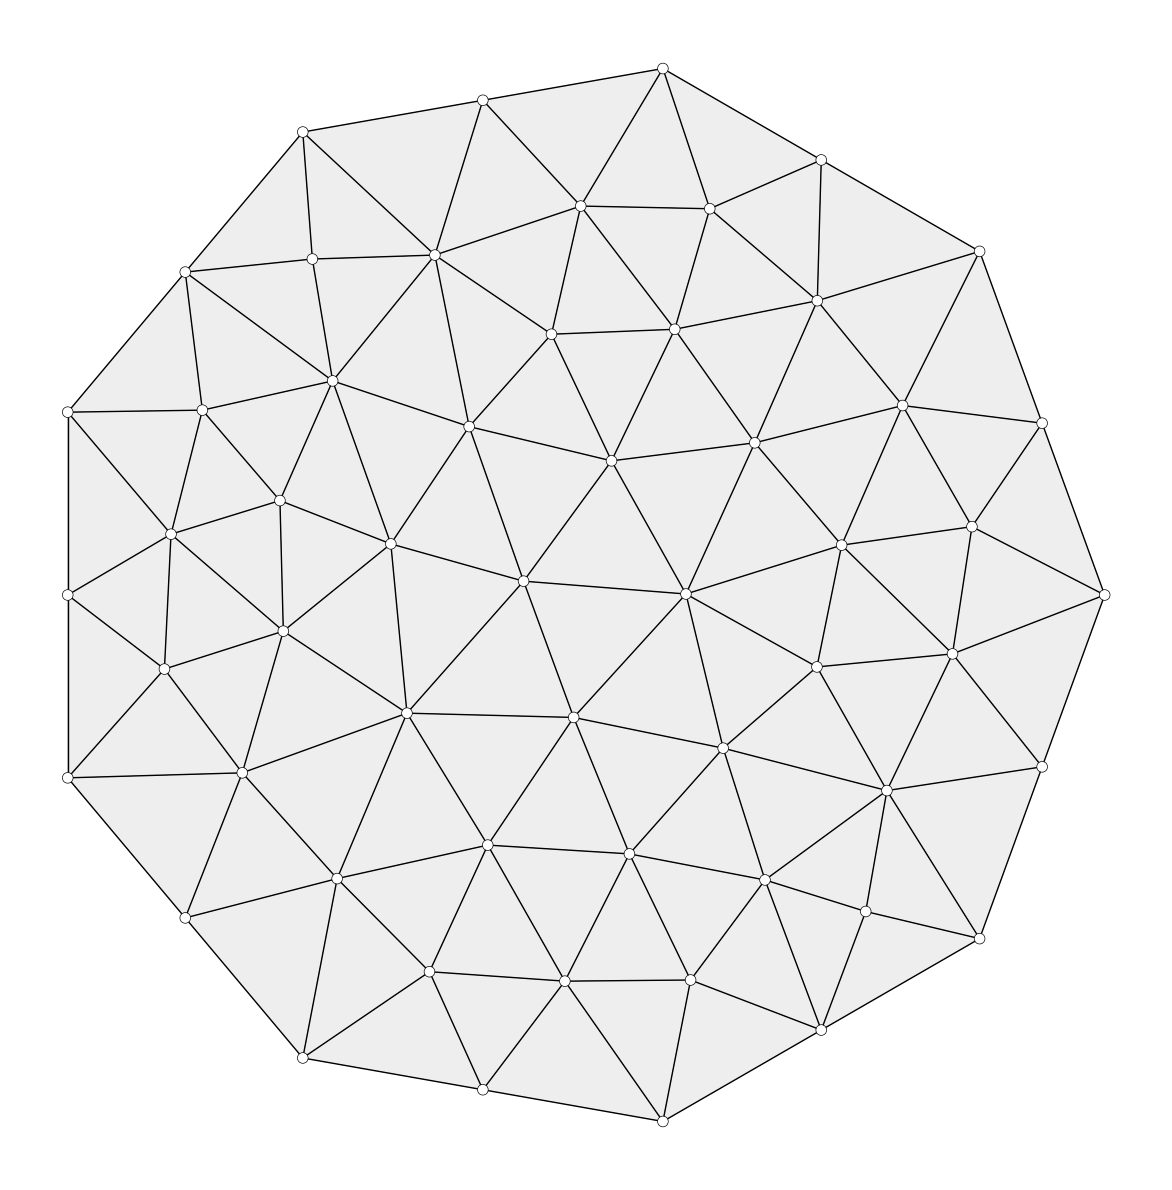

In [17]:
from compas.datastructures import trimesh_remesh


trimesh_remesh(mesh0, 2.5,
                       verbose=False, allow_boundary_split=True, allow_boundary_collapse=True)


plotter = MeshPlotter(mesh0)
plotter.draw_edges()
plotter.draw_vertices()
plotter.draw_faces()
plotter.show()

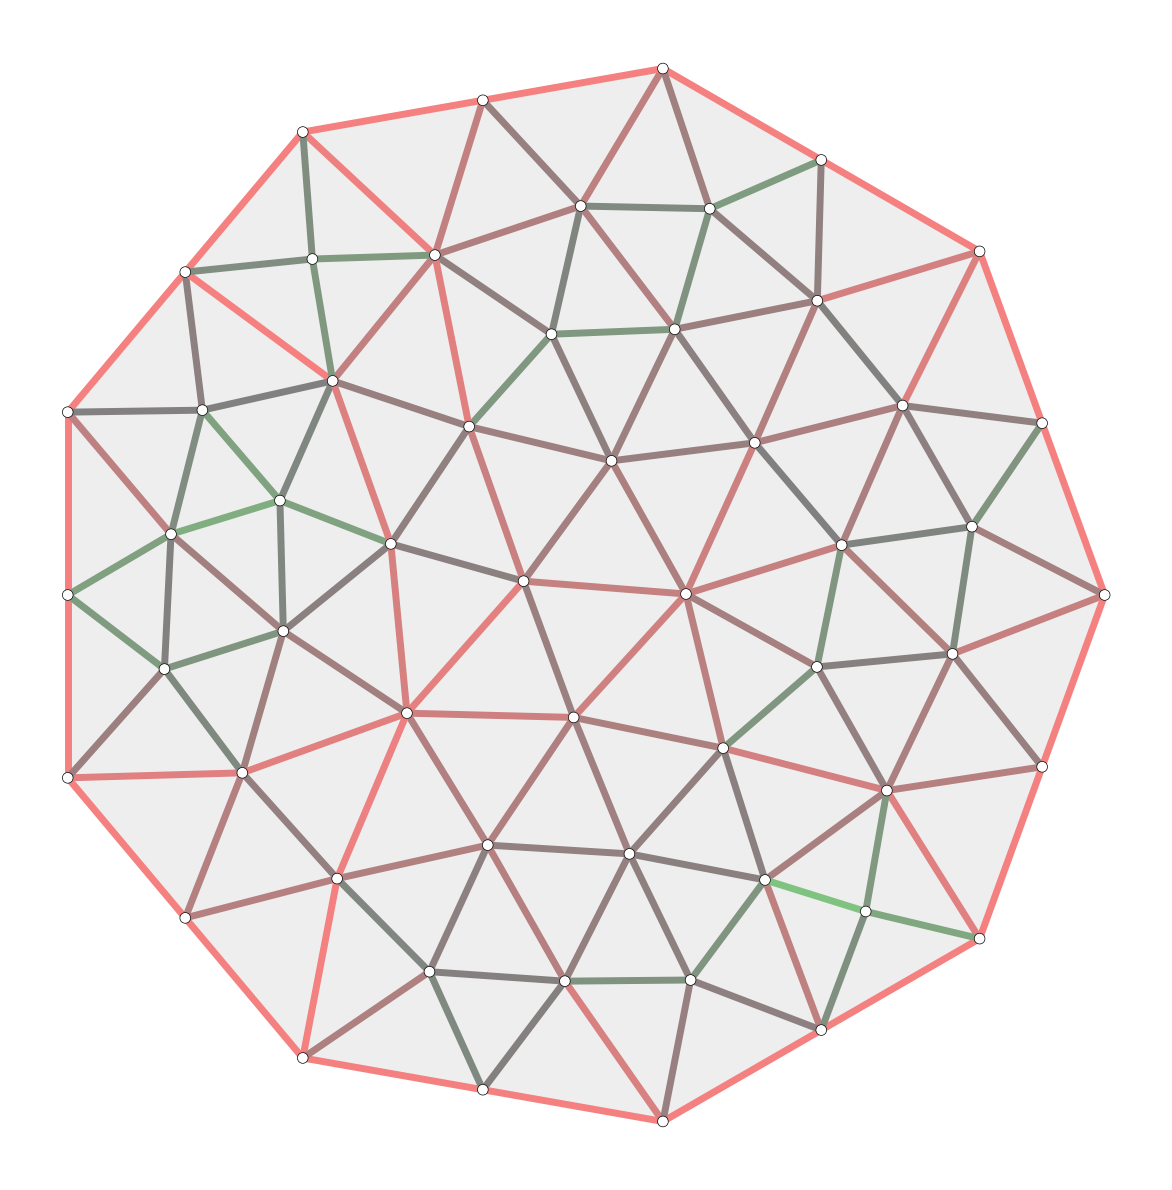

In [39]:
edgedict = {}

for ekey in mesh0.edges():
    el = mesh0.edge_length(*ekey)
    edgedict[ekey] = el

colordict = {}
for ekey in edgedict:
    el = edgedict[ekey]
    el = el - 2.5
    r,g,b = .5, .5, .5
    if el <0:
        g += abs(el)/2.
    else:
        r += abs(el)/2.0
    colordict[ekey] = [r,g,b]

plotter = MeshPlotter(mesh0)
plotter.draw_edges(color = colordict, width=5)
plotter.draw_vertices()
plotter.draw_faces()
plotter.show()